In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import collections
import plotly 
import plotly.plotly as py
import plotly.graph_objs as go
%matplotlib inline

In [3]:
from _helper import checking_missing, correlation_analysis, series_to_freq

In [3]:
# plotly.tools.set_credentials_file(username='ShuyuanZhao', api_key='QlHttzgXOdXCz2U1EbOD')

# Load dataset

In [4]:
print('Loading data...')
df = pd.read_csv("../../MLProject/data_train.csv")
print('Data is loaded')
# print('The shape of data_train is:',df.shape)
# print("Summary of the basic information about this DataFrame and its data:")
# print(df.info())

Loading data...
Data is loaded


In [6]:
# df.head(3)

# Exploring training data

In [5]:
target_columns = ['ASOURCE','ATYPE','RACE','ZIPINC_QRTL','TOTCHG']
CM_columns = []
DXCCS_columns = []
PRCCS_columns = []
PRDAY_columns = []
HOSP_columns = []
other_columns = []
for col in df.columns:
    if re.match('^CM',col):
        CM_columns.append(col)
    elif re.match('^DXCCS',col):
        DXCCS_columns.append(col)
    elif re.match('^PRCCS',col):
        PRCCS_columns.append(col)
    elif re.match('^PRDAY',col):
        PRDAY_columns.append(col)
    elif re.match('^HOSP',col):
        HOSP_columns.append(col)
    elif col not in target_columns:
        other_columns.append(col)

In [77]:
# for i in other_columns:
#     print(i)

## Target variables

In [53]:
ASOURCE_freq_table = series_to_freq(df['ASOURCE'])
ATYPE_freq_table = series_to_freq(df['ATYPE'])
RACE_freq_table = series_to_freq(df['RACE'])
ZIPINC_QRTL_freq_table = series_to_freq(df['ZIPINC_QRTL'])

In [65]:
print('Frequency table of ASOURCE:')
ASOURCE_freq_table.sort_values('category')

Frequency table of ASOURCE:


,category,frequence
3,1,125221
0,2,17353
2,3,14479
4,4,124
1,5,337755


In [68]:
print('Frequency table of ATYPE:')
ATYPE_freq_table.sort_values('category')

Frequency table of ATYPE:


,category,frequence
2,1,262596
0,2,89669
1,3,110777
3,4,30489
4,5,691
5,6,710


In [69]:
print('Frequency table of RACE:')
RACE_freq_table.sort_values('category')

Frequency table of RACE:


,category,frequence
0,1,338808
1,2,87641
2,3,41343
5,4,6912
4,5,763
3,6,19465


In [71]:
print('Frequency table of ZIPINC_QRTL:')
ZIPINC_QRTL_freq_table.sort_values('category')

Frequency table of ZIPINC_QRTL:


,category,frequence
1,1,129168
2,2,87081
0,3,113707
3,4,164976


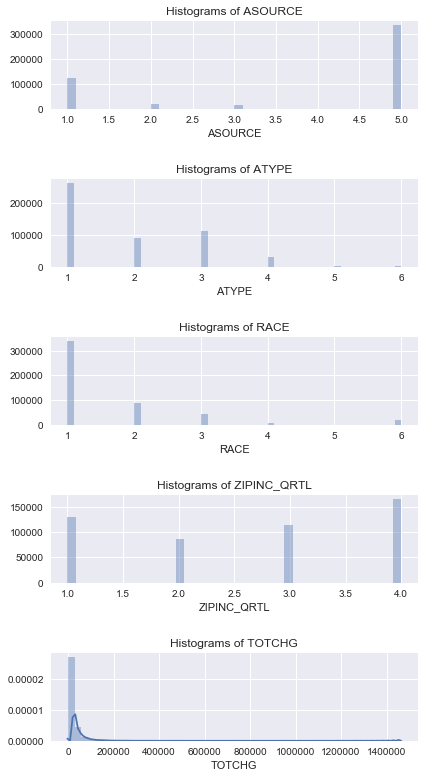

In [52]:
plt.figure(1)
plt.subplot(511)
sns.distplot(df['ASOURCE'],kde=False)
plt.title('Histograms of ASOURCE')

plt.subplot(512)
sns.distplot(df['ATYPE'],kde=False)
plt.title('Histograms of ATYPE')

plt.subplot(513)
sns.distplot(df['RACE'],kde=False)
plt.title('Histograms of RACE')

plt.subplot(514)
sns.distplot(df['ZIPINC_QRTL'],kde=False)
plt.title('Histograms of ZIPINC_QRTL')

plt.subplot(515)
sns.distplot(df['TOTCHG'],kde=True)
plt.title('Histograms of TOTCHG')

plt.subplots_adjust(top=3.00, bottom=0.50, left=0.10, right=0.95, hspace=0.80,
                    wspace=0.45)

In [22]:
# Pie chart of ASOURCE
# freq_table = series_to_freq(df['ASOURCE'])
# trace = go.Pie(labels=freq_table.iloc[:,0], values=freq_table.iloc[:,1])
# py.iplot([trace], filename='basic_pie_chart')

In [23]:
# Pie chart of ZIPINC_QRTL
# freq_table = series_to_freq(df['ZIPINC_QRTL'])
# trace = go.Pie(labels=freq_table.iloc[:,0], values=freq_table.iloc[:,1])
# py.iplot([trace], filename='basic_pie_chart')

In [74]:
sub_target = df.loc[:,target_columns]

In [76]:
missing_target = checking_missing(sub_target,False)

There is no missing value...


## other_columns

In [44]:
sub_others = df.loc[:,other_columns]
print('Listing other columns...')
print(other_columns)
print('The shape of the subset is:',sub_others.shape)

Listing other columns...
['AGE', 'AMONTH', 'AWEEKEND', 'DIED', 'DISCWT', 'DISPUNIFORM', 'DQTR', 'FEMALE', 'KEY', 'LOS', 'MDC', 'NDX', 'NIS_STRATUM', 'NPR', 'ORPROC', 'PAY1', 'TOTAL_DISC']
The shape of the subset is: (494932, 17)


In [14]:
# checking missing values
missing_others = checking_missing(sub_others,False)

The number of missing value for AGE is: 34 , 0.01 %
The number of missing value for AMONTH is: 2 , 0.00 %
The number of missing value for AWEEKEND is: 2 , 0.00 %
The number of missing value for DIED is: 536 , 0.11 %
The number of missing value for DISPUNIFORM is: 536 , 0.11 %
The number of missing value for FEMALE is: 14 , 0.00 %
The number of missing value for LOS is: 14 , 0.00 %
The number of missing value for PAY1 is: 203 , 0.04 %


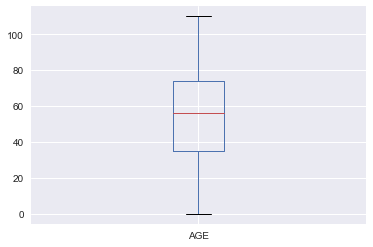

In [54]:
df.loc[:,['AGE']].plot.box()

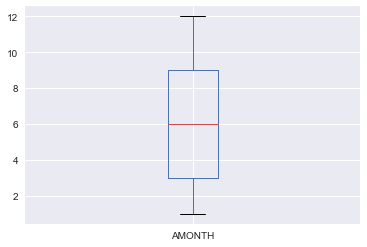

In [56]:
df.loc[:,['AMONTH']].plot.box()

In [63]:
print('DIED:')
print(series_to_freq(df['DIED'].fillna(999)))

DIED:
   category  frequence
0       0.0     484319
1       1.0      10077
2     999.0        536


In [65]:
print('DISPUNIFORM:')
print(series_to_freq(df['DISPUNIFORM'].fillna(999)))

DISPUNIFORM:
   category  frequence
0       1.0     326018
1       6.0      58872
2       5.0      76064
3      20.0      10077
4       2.0      15757
5       7.0       7581
6      99.0         27
7     999.0        536


In [74]:
# print('LOS:')
# print(series_to_freq(df['LOS'].fillna(999)))

In [69]:
print('PAY1:')
print(series_to_freq(df['PAY1'].fillna(999)))

PAY1:
   category  frequence
0       6.0      17545
1       1.0     205433
2       3.0     154404
3       2.0      95038
4       4.0      20614
5     999.0        203
6       5.0       1695


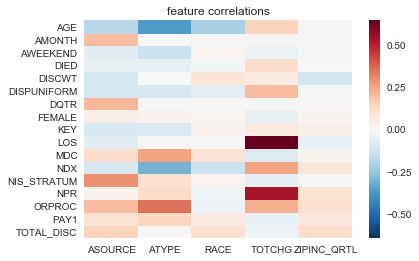

In [79]:
# print the heatmap of feature correlations
target = ['ASOURCE','ATYPE','RACE','TOTCHG','ZIPINC_QRTL']
source = other_columns
other_columns_correlation = correlation_analysis(df, target, source)

In [82]:
# sub_others.head(50)

## PRDAY_columns

In [84]:
sub_prday = df.loc[:,PRDAY_columns]
print('Listing prday columns...')
print(PRDAY_columns)
print('The shape of the subset is:',sub_prday.shape)

Listing prday columns...
['PRDAY1', 'PRDAY2', 'PRDAY3', 'PRDAY4', 'PRDAY5', 'PRDAY6', 'PRDAY7', 'PRDAY8', 'PRDAY9', 'PRDAY10', 'PRDAY11', 'PRDAY12', 'PRDAY13', 'PRDAY14', 'PRDAY15']
The shape of the subset is: (494932, 15)


In [9]:
# checking missing values
missing_prday = checking_missing(sub_prday,False)

The number of missing value for PRDAY1 is: 196285 , 39.66 %
The number of missing value for PRDAY2 is: 322902 , 65.24 %
The number of missing value for PRDAY3 is: 394795 , 79.77 %
The number of missing value for PRDAY4 is: 432454 , 87.38 %
The number of missing value for PRDAY5 is: 453270 , 91.58 %
The number of missing value for PRDAY6 is: 466802 , 94.32 %
The number of missing value for PRDAY7 is: 478445 , 96.67 %
The number of missing value for PRDAY8 is: 484064 , 97.80 %
The number of missing value for PRDAY9 is: 487770 , 98.55 %
The number of missing value for PRDAY10 is: 489878 , 98.98 %
The number of missing value for PRDAY11 is: 491303 , 99.27 %
The number of missing value for PRDAY12 is: 492670 , 99.54 %
The number of missing value for PRDAY13 is: 493213 , 99.65 %
The number of missing value for PRDAY14 is: 493614 , 99.73 %
The number of missing value for PRDAY15 is: 493959 , 99.80 %


In [10]:
# sub_prday.describe()

/Users/Shuyuan/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning:

invalid value encountered in greater

/Users/Shuyuan/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning:

invalid value encountered in less



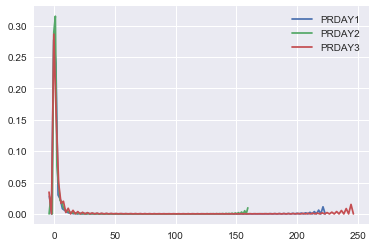

In [85]:
# Fit and plot a univariate or bivariate kernel density estimate.
sns.kdeplot(df[PRDAY_columns[0]],label = 'PRDAY1')
sns.kdeplot(df[PRDAY_columns[1]],label = 'PRDAY2')
sns.kdeplot(df[PRDAY_columns[2]],label = 'PRDAY3')
plt.legend();

In [86]:
sub_prday.head(10)

,PRDAY1,PRDAY2,PRDAY3,PRDAY4,PRDAY5,PRDAY6,PRDAY7,PRDAY8,PRDAY9,PRDAY10,PRDAY11,PRDAY12,PRDAY13,PRDAY14,PRDAY15
0,37.0,37.0,37.0,37.0,1.0,29.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,4.0,0.0,2.0,3.0,3.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,2.0,14.0,29.0,7.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18.0,6.0,19.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,1.0,1.0,8.0,8.0,7.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,0.0,36.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,13.0,13.0,22.0,22.0,22.0,13.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.0,5.0,3.0,3.0,29.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


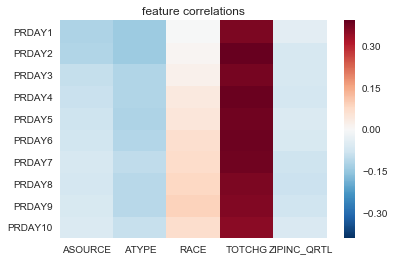

In [88]:
# print the heatmap of feature correlations
target = ['ASOURCE','ATYPE','RACE','TOTCHG','ZIPINC_QRTL']
source = PRDAY_columns[:10]
PRDAY_columns_correlation = correlation_analysis(df,target, source)

## HOSP_columns

In [7]:
sub_hosp = df.loc[:,HOSP_columns]
print('Listing HOSP columns...')
print(HOSP_columns)
print('The shape of the subset is:',sub_hosp.shape)
# checking missing values
missing_hosp = checking_missing(sub_hosp,False)

Listing HOSP columns...
['HOSPID', 'HOSP_BEDSIZE', 'HOSP_CONTROL', 'HOSP_LOCTEACH', 'HOSP_REGION']
The shape of the subset is: (494932, 5)
The number of missing value for HOSP_BEDSIZE is: 714 , 0.14 %
The number of missing value for HOSP_CONTROL is: 714 , 0.14 %
The number of missing value for HOSP_LOCTEACH is: 714 , 0.14 %


In [33]:
sub_hosp.head(5)

,HOSPID,HOSP_BEDSIZE,HOSP_CONTROL,HOSP_LOCTEACH,HOSP_REGION
0,5021,1.0,3.0,2.0,3
1,5021,1.0,3.0,2.0,3
2,5021,1.0,3.0,2.0,3
3,5021,1.0,3.0,2.0,3
4,5021,1.0,3.0,2.0,3


In [41]:
print(sub_hosp.loc[500])

HOSPID           5017.0
HOSP_BEDSIZE        1.0
HOSP_CONTROL        2.0
HOSP_LOCTEACH       1.0
HOSP_REGION         3.0
Name: 500, dtype: float64


In [31]:
print('HOSP_BEDSIZE:')
print(series_to_freq(sub_hosp['HOSP_BEDSIZE'].fillna(999)))

HOSP_BEDSIZE:
   category  frequence
0       1.0     113966
1       2.0     146914
2       3.0     233338
3     999.0        714


In [29]:
print('HOSP_CONTROL:')
print(series_to_freq(sub_hosp['HOSP_CONTROL'].fillna(999)))

HOSP_CONTROL:
   category  frequence
0       3.0      13448
1       2.0      67188
2       1.0      46331
3       0.0     359892
4       4.0       7359
5     999.0        714


In [30]:
print('HOSP_LOCTEACH:')
print(series_to_freq(sub_hosp['HOSP_LOCTEACH'].fillna(999)))

HOSP_LOCTEACH:
   category  frequence
0       2.0     237807
1       1.0      34653
2       3.0     221758
3     999.0        714


In [42]:
# frequence = series_to_freq(sub_hosp['HOSPID'])
# print(frequence)

In [19]:
Missing_Index = []
for index, row in sub_hosp.iterrows():
    if row.isnull().any():
        Missing_Index.append(index)
print('HOSP_REGION:')
frequence = series_to_freq(sub_hosp['HOSP_REGION'].loc[Missing_Index])
print(frequence)

HOSP_REGION:
   category  frequence
0         3        714


In [21]:
print('HOSPID:')
print(series_to_freq(sub_hosp['HOSPID'].loc[Missing_Index]))

HOSPID:
   category  frequence
0     22060        714


## DXCCS_columns

In [17]:
sub_dxccs = df.loc[:,DXCCS_columns]
print('Listing DXCCS columns...')
print(DXCCS_columns)
print('The shape of the subset is:',sub_dxccs.shape)
# checking missing values
missing_dxccs = checking_missing(sub_dxccs,False)

Listing DXCCS columns...
['DXCCS1', 'DXCCS2', 'DXCCS3', 'DXCCS4', 'DXCCS5', 'DXCCS6', 'DXCCS7', 'DXCCS8', 'DXCCS9', 'DXCCS10', 'DXCCS11', 'DXCCS12', 'DXCCS13', 'DXCCS14', 'DXCCS15', 'DXCCS16', 'DXCCS17', 'DXCCS18', 'DXCCS19', 'DXCCS20', 'DXCCS21', 'DXCCS22', 'DXCCS23', 'DXCCS24', 'DXCCS25']
The shape of the subset is: (494932, 25)
The number of missing value for DXCCS1 is: 318 , 0.06 %
The number of missing value for DXCCS2 is: 18051 , 3.65 %
The number of missing value for DXCCS3 is: 51085 , 10.32 %
The number of missing value for DXCCS4 is: 86881 , 17.55 %
The number of missing value for DXCCS5 is: 124870 , 25.23 %
The number of missing value for DXCCS6 is: 162554 , 32.84 %
The number of missing value for DXCCS7 is: 199561 , 40.32 %
The number of missing value for DXCCS8 is: 237881 , 48.06 %
The number of missing value for DXCCS9 is: 278672 , 56.31 %
The number of missing value for DXCCS10 is: 311821 , 63.00 %
The number of missing value for DXCCS11 is: 337145 , 68.12 %
The number of

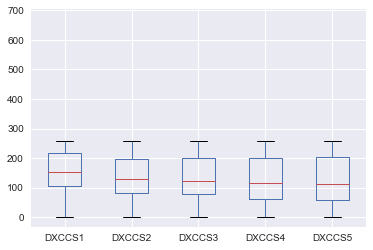

In [92]:
df.loc[:,DXCCS_columns[:5]].plot.box()

In [93]:
df.loc[:,DXCCS_columns[:5]].mode()

,DXCCS1,DXCCS2,DXCCS3,DXCCS4,DXCCS5
0,218.0,55.0,98.0,98.0,98.0


In [94]:
# sns.kdeplot(df[DXCCS_columns[0]],label = 'DXCCS1')
# sns.kdeplot(df[DXCCS_columns[1]],label = 'DXCCS2')
# sns.kdeplot(df[DXCCS_columns[2]],label = 'DXCCS3')
# sns.kdeplot(df[DXCCS_columns[3]],label = 'DXCCS4')
# sns.kdeplot(df[DXCCS_columns[4]],label = 'DXCCS5')
# plt.legend();

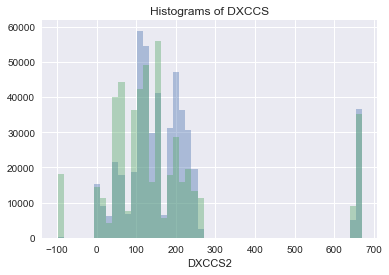

In [19]:
check_sub_dxccs = df.loc[:,DXCCS_columns].fillna(-99)
sns.distplot(check_sub_dxccs[DXCCS_columns[0]],kde=False,label = 'DXCCS1')
sns.distplot(check_sub_dxccs[DXCCS_columns[1]],kde=False,label = 'DXCCS2')
plt.title('Histograms of DXCCS')

In [20]:
sub_dxccs.head(3)

,DXCCS1,DXCCS2,DXCCS3,DXCCS4,DXCCS5,DXCCS6,DXCCS7,DXCCS8,DXCCS9,DXCCS10,...,DXCCS16,DXCCS17,DXCCS18,DXCCS19,DXCCS20,DXCCS21,DXCCS22,DXCCS23,DXCCS24,DXCCS25
0,2.0,157.0,199.0,52.0,4.0,237.0,159.0,82.0,55.0,161.0,...,199.0,201.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,131.0,2.0,244.0,52.0,108.0,55.0,81.0,133.0,108.0,155.0,...,49.0,140.0,138.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,145.0,2.0,2.0,4.0,244.0,52.0,131.0,122.0,122.0,97.0,...,237.0,3.0,250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# sub_dxccs.describe()

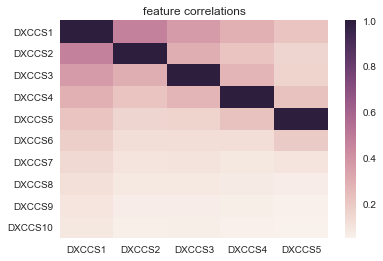

In [22]:
# print the heatmap of feature correlations
target = DXCCS_columns[:5]
source = DXCCS_columns[:10]
PRDAY_columns_correlation = correlation_analysis(df,target, source)

## PRCCS_columns

In [23]:
sub_prccs = df.loc[:,PRCCS_columns]
print('Listing PRCCS columns...')
print(PRCCS_columns)
print('The shape of the subset is:',sub_prccs.shape)
# checking missing values
missing_prccs = checking_missing(sub_prccs,False)

Listing PRCCS columns...
['PRCCS1', 'PRCCS2', 'PRCCS3', 'PRCCS4', 'PRCCS5', 'PRCCS6', 'PRCCS7', 'PRCCS8', 'PRCCS9', 'PRCCS10', 'PRCCS11', 'PRCCS12', 'PRCCS13', 'PRCCS14', 'PRCCS15']
The shape of the subset is: (494932, 15)
The number of missing value for PRCCS1 is: 196207 , 39.64 %
The number of missing value for PRCCS2 is: 322883 , 65.24 %
The number of missing value for PRCCS3 is: 394778 , 79.76 %
The number of missing value for PRCCS4 is: 432450 , 87.38 %
The number of missing value for PRCCS5 is: 453259 , 91.58 %
The number of missing value for PRCCS6 is: 466793 , 94.31 %
The number of missing value for PRCCS7 is: 476734 , 96.32 %
The number of missing value for PRCCS8 is: 483075 , 97.60 %
The number of missing value for PRCCS9 is: 487261 , 98.45 %
The number of missing value for PRCCS10 is: 489548 , 98.91 %
The number of missing value for PRCCS11 is: 491072 , 99.22 %
The number of missing value for PRCCS12 is: 492177 , 99.44 %
The number of missing value for PRCCS13 is: 492850 , 9

In [24]:
sub_prccs.head(5)

,PRCCS1,PRCCS2,PRCCS3,PRCCS4,PRCCS5,PRCCS6,PRCCS7,PRCCS8,PRCCS9,PRCCS10,PRCCS11,PRCCS12,PRCCS13,PRCCS14,PRCCS15
0,103.0,54.0,70.0,71.0,223.0,222.0,223.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,37.0,216.0,223.0,216.0,216.0,70.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,223.0,223.0,54.0,216.0,222.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,222.0,174.0,65.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,216.0,216.0,223.0,222.0,37.0,37.0,54.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# sub_prccs.describe()

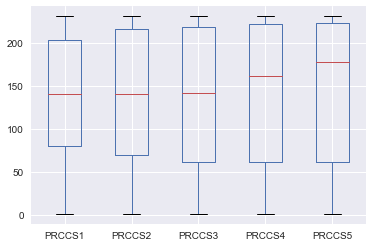

In [89]:
df.loc[:,PRCCS_columns[:5]].plot.box()

In [90]:
df.loc[:,PRCCS_columns[:5]].mode()

,PRCCS1,PRCCS2,PRCCS3,PRCCS4,PRCCS5
0,219.0,231.0,231.0,231.0,231.0


/Users/Shuyuan/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning:

invalid value encountered in greater

/Users/Shuyuan/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning:

invalid value encountered in less



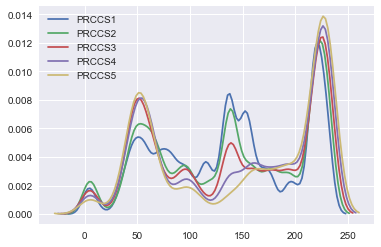

In [26]:
sns.kdeplot(df[PRCCS_columns[0]],label = 'PRCCS1')
sns.kdeplot(df[PRCCS_columns[1]],label = 'PRCCS2')
sns.kdeplot(df[PRCCS_columns[2]],label = 'PRCCS3')
sns.kdeplot(df[PRCCS_columns[3]],label = 'PRCCS4')
sns.kdeplot(df[PRCCS_columns[4]],label = 'PRCCS5')
plt.legend();

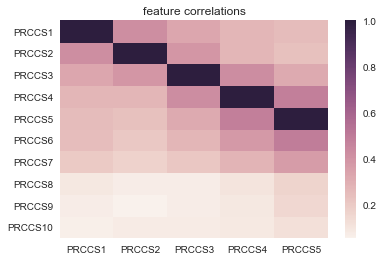

In [28]:
# print the heatmap of feature correlations
target = PRCCS_columns[:5]
source = PRCCS_columns[:10]
PRCCS_columns_correlation = correlation_analysis(df,target, source)

## CM_columns

In [95]:
sub_cm = df.loc[:,CM_columns]
print('Listing CM columns...')
print(CM_columns)
print('The shape of the subset is:',sub_cm.shape)
# checking missing values
missing_cm = checking_missing(sub_cm,False)

Listing CM columns...
['CM_AIDS', 'CM_ALCOHOL', 'CM_ANEMDEF', 'CM_ARTH', 'CM_BLDLOSS', 'CM_CHF', 'CM_CHRNLUNG', 'CM_COAG', 'CM_DEPRESS', 'CM_DM', 'CM_DMCX', 'CM_DRUG', 'CM_HTN_C', 'CM_HYPOTHY', 'CM_LIVER', 'CM_LYMPH', 'CM_LYTES', 'CM_METS', 'CM_NEURO', 'CM_OBESE', 'CM_PARA', 'CM_PERIVASC', 'CM_PSYCH', 'CM_PULMCIRC', 'CM_RENLFAIL', 'CM_TUMOR', 'CM_ULCER', 'CM_VALVE', 'CM_WGHTLOSS']
The shape of the subset is: (494932, 29)
There is no missing value...


In [100]:
sub_cm.head(5)

,CM_AIDS,CM_ALCOHOL,CM_ANEMDEF,CM_ARTH,CM_BLDLOSS,CM_CHF,CM_CHRNLUNG,CM_COAG,CM_DEPRESS,CM_DM,...,CM_OBESE,CM_PARA,CM_PERIVASC,CM_PSYCH,CM_PULMCIRC,CM_RENLFAIL,CM_TUMOR,CM_ULCER,CM_VALVE,CM_WGHTLOSS
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1


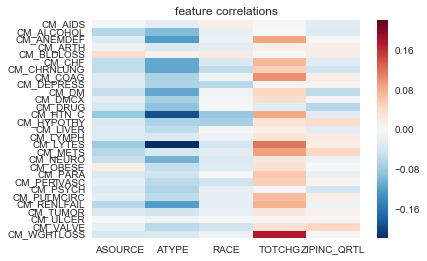

In [31]:
# print the heatmap of feature correlations
target = ['ASOURCE','ATYPE','RACE','TOTCHG','ZIPINC_QRTL']
source = CM_columns
CM_columns_correlation = correlation_analysis(df,target, source)

## HOSP_columns

In [102]:
sub_hosp = df.loc[:,HOSP_columns]

In [103]:
sub_HOSP = df.loc[:,HOSP_columns]
print('Listing HOSP columns...')
print(HOSP_columns)
print('The shape of the subset is:',sub_HOSP.shape)
# checking missing values
missing_cm = checking_missing(sub_HOSP,False)

Listing HOSP columns...
['HOSPID', 'HOSP_BEDSIZE', 'HOSP_CONTROL', 'HOSP_LOCTEACH', 'HOSP_REGION']
The shape of the subset is: (494932, 5)
The number of missing value for HOSP_BEDSIZE is: 714 , 0.14 %
The number of missing value for HOSP_CONTROL is: 714 , 0.14 %
The number of missing value for HOSP_LOCTEACH is: 714 , 0.14 %


In [104]:
sub_hosp.head()

,HOSPID,HOSP_BEDSIZE,HOSP_CONTROL,HOSP_LOCTEACH,HOSP_REGION
0,5021,1.0,3.0,2.0,3
1,5021,1.0,3.0,2.0,3
2,5021,1.0,3.0,2.0,3
3,5021,1.0,3.0,2.0,3
4,5021,1.0,3.0,2.0,3
